In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
X = np.array([[1,0,1],
              [1,2,5],
              [1,2,7],
              [5,2,8]])
X.shape

(4, 3)

In [6]:
y = np.array([[1],
              [0],
              [1],
              [0]])
y.shape

(4, 1)

<img src = "https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-diagram.jpg"> </p>
So in Hidden layer Activation(Non linear) funtion is ReLU and in output Layer it's Sigmoid.

In [7]:
def sigmoid(x, deriv = False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))       

In [8]:
np.random.seed(42)
H = 3  # No. of neuron in a hidden layer
D_out = 1
w1 = np.random.randn(X.shape[1], H)
b1 = np.random.randn(X.shape[0], H)
w2 = np.random.randn(H, D_out)
b2 = np.random.randn(X.shape[0], D_out)

learning_rate = 0.01

In [9]:
losses = {}
y_values = {}
for iters in range(30000):

    #forward propogation
    z1 = X.dot(w1) + b1
    h1 = np.maximum(z1, 0)  # ReLU Function
    z2 = h1.dot(w2) + b2
    h2 = sigmoid(z2)
    y_pred = h2
    y_values[iters] = y_pred

    # Loss
    y_loss = np.square(y_pred - y).sum()
    losses[iters] = y_loss

    #backward propogation
    h2_grad = 2*(y_pred - y)
    z2_grad = h2_grad * sigmoid(h2, True)
    b2_grad = z2_grad
    w2_grad = h1.T.dot(z2_grad)
    h1_grad = z2_grad.dot(w2.T)
    # this two line of code is dev of ReLU fuction
    z1_grad = h1_grad.copy()
    z1_grad[z1 < 0] = 0

    b1_grad = z1_grad
    w1_grad = X.T.dot(z1_grad)

    # updating weights
    w1 -= learning_rate*w1_grad
    b1 -= learning_rate*b1_grad
    w2 -= learning_rate*w2_grad
    b2 -= learning_rate*b2_grad


Text(0, 0.5, 'Loss')

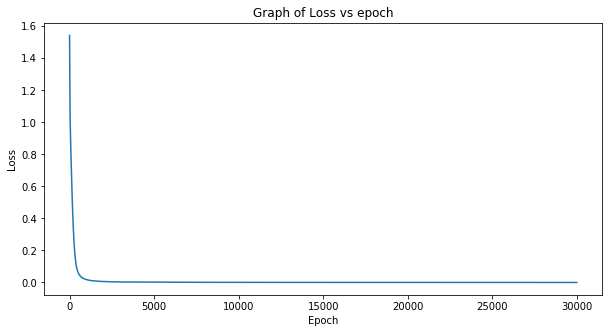

In [10]:
plt.figure(figsize=(10,5))
plt.plot(losses.keys(), losses.values())
plt.title('Graph of Loss vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

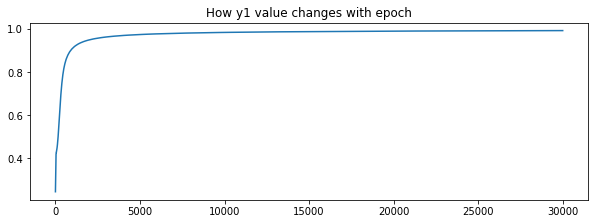

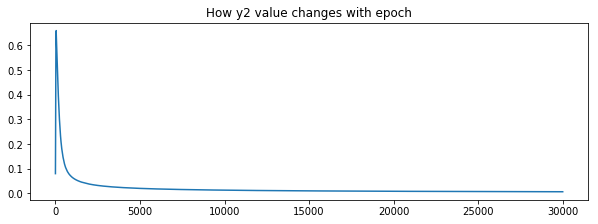

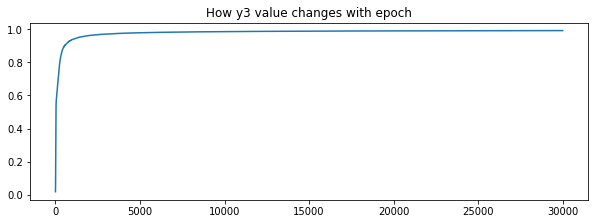

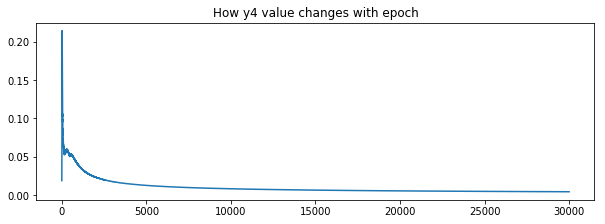

In [11]:
for i in range(1,5):
    plt.figure(figsize=(10,15))
    plt.subplot(4,1,i)
    plt.plot(y_values.keys(),[j[i-1] for _, j in y_values.items()])
    plt.title('How y'+str(i)+' value changes with epoch')
    plt.show()